In [ ]:
https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction


# SOMMAIRE


1.   Introduction
3.   Appel des libraires et de la BDD
4.   Exploration du Data Set



## **1. Introduction**

L'étude vise à analyser l'ensemble des données relatives aux réservations de vols collectées sur le site web "Ease My Trip" et à mener divers tests d'hypothèses statistiques pour en extraire des informations pertinentes. Un algorithme de régression linéaire sera utilisé pour entraîner le jeu de données et prédire une variable cible continue. Ease My Trip est une plateforme en ligne spécialisée dans la réservation de billets d'avion, utilisée par les passagers potentiels pour acheter leurs billets. Une analyse approfondie des données permettra de révéler des informations précieuses qui bénéficieront aux voyageurs.

**Accès à la base de données :** https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction


Cette étude sera menée par : **Anaïs TAIATI** et **Matthis MONNIER**

### **Le Data Set**

*L'ensemble de données contient des informations sur les options de réservation de vols du site web Easemytrip pour les vols entre les 6 principales villes métropolitaines de l'Inde. Il y a 300261 points de données et 11 caractéristiques dans l'ensemble de données nettoyé.*

**FEATURES**

1.  **Airline** : Nom de la compagnie, une colonne catégorique avec 6 valeurs possibles *(SpiceJet, AirAsia, Vistara, GO_FIRST, Indigo, Air_India)*
2.   **Flight** : Le code d'identification du vol, une colonne catégorique, clé primaire
3.   **Source City** : Ville de départ, une colonne catégorique avec 6 valeurs possibles *(Mumbai,Bangalore, Kolkata, Hyderabad, Chennai, Delhi)*
4.   **Departure Time** : Heure de départ, une colonne catégorique avec 6 valeurs possibles *(Early_Morning, Morning, Afternoon, Evening, Night, Late_Night)*
5.   **Stops** : Nombre d'arrêt du vol, une colonne avec 3 labels possibles *(one, two_or_more, zero)*
6.   **Arrival Time** : Heure d'arrivée, une colonne catégorique avec 6 valeurs possibles *(Early_Morning, Morning, Afternoon, Evening, Night, Late_Night)*
7.   **Destination city** : Ville d'arrivée, une colonne catégrique avec 6 valeurs possibles *(Mumbai,Bangalore, Kolkata, Hyderabad, Chennai, Delhi)*
8.   **Class** : De quelle classe était le billet, une colonne catégorique avec 2 valeurs possibles *(Business et Economy)*
9.   **Duration** : Durée du vol, une colonne continue qui renseigne du nombre d'heures de vol
10.  **Days Lets** : Nombre de jour entre la réservation et le départ, une colonne continue qui renseigne nombre de jour entre la réservation et le départ
11.  **Price** : Prix du billet, une colonne continue avec le prix du billet



## **2. Appel des Librairies et de la BDD**

In [ ]:
#Les Librairies de Travail
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
#Pour importer la BDD à partir de Kaggle
import kagglehub
path = kagglehub.dataset_download("shubhambathwal/flight-price-prediction")
print("Path to dataset files:", path)


!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d shubhambathwal/flight-price-prediction

import zipfile
with zipfile.ZipFile('flight-price-prediction.zip', 'r') as zip_ref:
    zip_ref.extractall('flight-price-prediction')

## **3. Exploration du Data Set**

In [ ]:
#Voir les entêtes et supprimer la colonne d'indice 0 "Unnaamed"
df = pd.read_csv('flight-price-prediction/Clean_Dataset.csv')
df = df.drop('Unnamed: 0', axis=1)

print(df.head())

    airline   flight source_city departure_time stops   arrival_time  \
0  SpiceJet  SG-8709       Delhi        Evening  zero          Night   
1  SpiceJet  SG-8157       Delhi  Early_Morning  zero        Morning   
2   AirAsia   I5-764       Delhi  Early_Morning  zero  Early_Morning   
3   Vistara   UK-995       Delhi        Morning  zero      Afternoon   
4   Vistara   UK-963       Delhi        Morning  zero        Morning   

  destination_city    class  duration  days_left  price  
0           Mumbai  Economy      2.17          1   5953  
1           Mumbai  Economy      2.33          1   5953  
2           Mumbai  Economy      2.17          1   5956  
3           Mumbai  Economy      2.25          1   5955  
4           Mumbai  Economy      2.33          1   5955  




Effectif par colonne par valeur unique : 


--------------------------------------------------
Répartition des occurrences pour la colonne 'airline':
  Nombre d'occurrences   count
0              Vistara  127859
1            Air_India   80892
2               Indigo   43120
3             GO_FIRST   23173
4              AirAsia   16098
5             SpiceJet    9011
--------------------------------------------------


<ipython-input-44-f79954dd48fd>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=colonne, order=df[colonne].value_counts().index, palette="Set2")


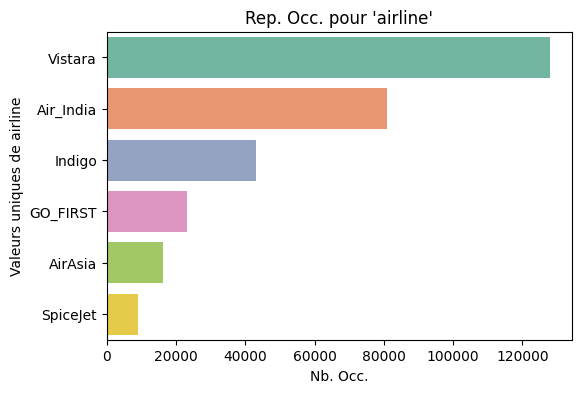

--------------------------------------------------
Répartition des occurrences pour la colonne 'source_city':
  Nombre d'occurrences  count
0                Delhi  61343
1               Mumbai  60896
2            Bangalore  52061
3              Kolkata  46347
4            Hyderabad  40806
5              Chennai  38700
--------------------------------------------------


<ipython-input-44-f79954dd48fd>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=colonne, order=df[colonne].value_counts().index, palette="Set2")


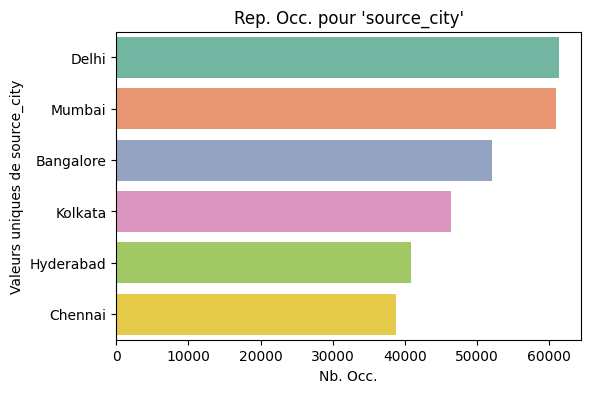

--------------------------------------------------
Répartition des occurrences pour la colonne 'departure_time':
  Nombre d'occurrences  count
0              Morning  71146
1        Early_Morning  66790
2              Evening  65102
3                Night  48015
4            Afternoon  47794
5           Late_Night   1306
--------------------------------------------------


<ipython-input-44-f79954dd48fd>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=colonne, order=df[colonne].value_counts().index, palette="Set2")


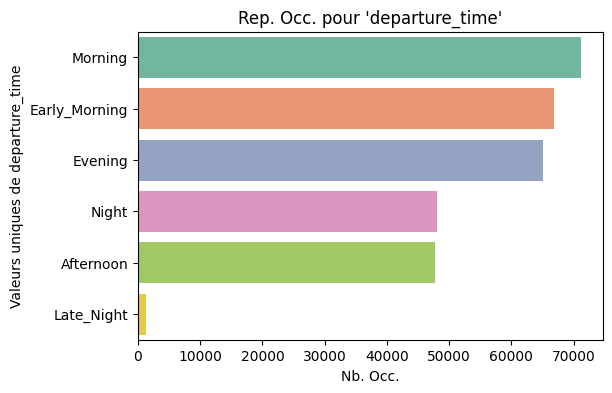

--------------------------------------------------
Répartition des occurrences pour la colonne 'stops':
  Nombre d'occurrences   count
0                  one  250863
1                 zero   36004
2          two_or_more   13286
--------------------------------------------------


<ipython-input-44-f79954dd48fd>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=colonne, order=df[colonne].value_counts().index, palette="Set2")


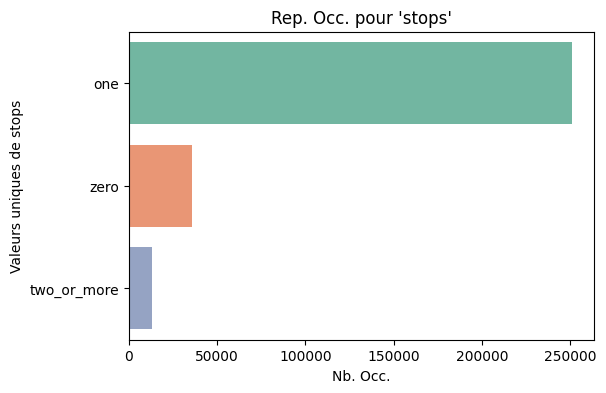

--------------------------------------------------
Répartition des occurrences pour la colonne 'arrival_time':
  Nombre d'occurrences  count
0                Night  91538
1              Evening  78323
2              Morning  62735
3            Afternoon  38139
4        Early_Morning  15417
5           Late_Night  14001
--------------------------------------------------


<ipython-input-44-f79954dd48fd>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=colonne, order=df[colonne].value_counts().index, palette="Set2")


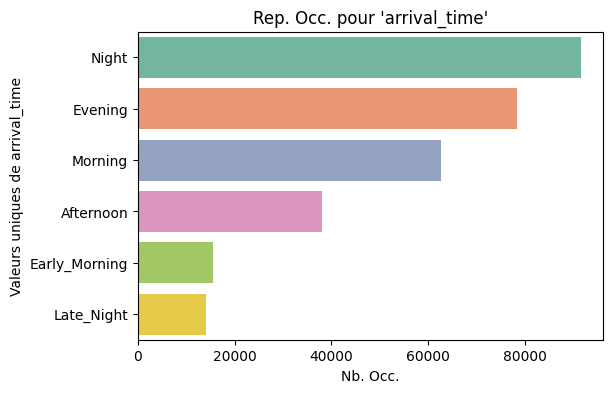

--------------------------------------------------
Répartition des occurrences pour la colonne 'destination_city':
  Nombre d'occurrences  count
0               Mumbai  59097
1                Delhi  57360
2            Bangalore  51068
3              Kolkata  49534
4            Hyderabad  42726
5              Chennai  40368
--------------------------------------------------


<ipython-input-44-f79954dd48fd>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=colonne, order=df[colonne].value_counts().index, palette="Set2")


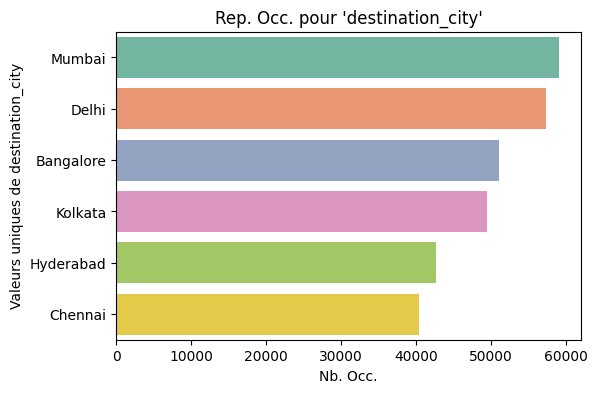

--------------------------------------------------
Répartition des occurrences pour la colonne 'class':
  Nombre d'occurrences   count
0              Economy  206666
1             Business   93487
--------------------------------------------------


<ipython-input-44-f79954dd48fd>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=colonne, order=df[colonne].value_counts().index, palette="Set2")


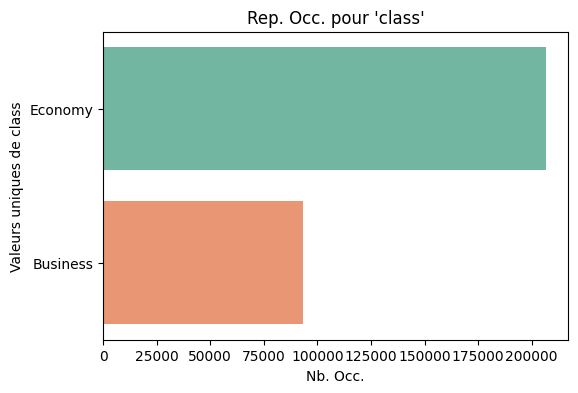

--------------------------------------------------
Répartition des occurrences pour la colonne 'days_left':
    Nombre d'occurrences  count
0                     25   6633
1                     18   6602
2                     39   6593
3                     32   6585
4                     26   6573
5                     24   6542
6                     19   6537
7                     31   6534
8                     33   6532
9                     40   6531
10                    41   6525
11                    28   6522
12                    38   6512
13                    20   6502
14                    30   6501
15                    42   6497
16                    22   6494
17                    36   6490
18                    21   6479
19                    37   6476
20                    43   6472
21                    44   6436
22                    17   6419
23                    11   6417
24                    34   6412
25                    13   6404
26                    23   6

<ipython-input-44-f79954dd48fd>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=colonne, order=df[colonne].value_counts().index, palette="Set2")


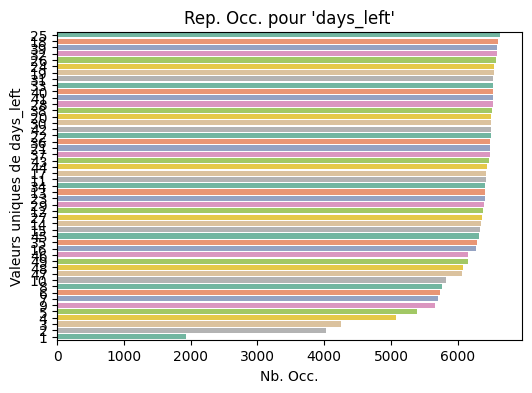

In [ ]:

# Voir les valeurs uniques pour chaque colonnes catégoriques


#for colonne in df.columns:
#  if colonne != 'flight' and colonne != 'price' and colonne != 'days_left' and colonne != 'duration' :
#    print(f"Valeurs uniques pour la colonne '{colonne}':")
#    print(df[colonne].unique())
#    print("-" * 20)

print ('\n')
print ('Effectif par colonne par valeur unique : ')
print ('\n')

# Liste des colonnes à analyser
colonnes_categorique= ['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']

# Afficher un tableau de répartition pour chaque colonne
# for colonne in colonnes_categoriques:
#    print(f"'{colonne}':")
#    print(df[colonne].value_counts().reset_index().rename(columns={'index': colonne, colonne: 'Nombre d\'occurrences'}))
#    print("-" * 50)

# On va essayer de rendre ces données plus visuelles
for colonne in colonnes_categorique:
    print("-" * 50)
    print(f"Répartition des occurrences pour la colonne '{colonne}':")
    print(df[colonne].value_counts().reset_index().rename(columns={'index': colonne, colonne: 'Nombre d\'occurrences'}))
    print("-" * 50)
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, y=colonne, order=df[colonne].value_counts().index, palette="Set2")
    plt.title(f"Rep. Occ. pour '{colonne}'")
    plt.xlabel("Nb. Occ.")
    plt.ylabel(f"Valeurs uniques de {colonne}")
    plt.show()

<Figure size 1000x600 with 0 Axes>

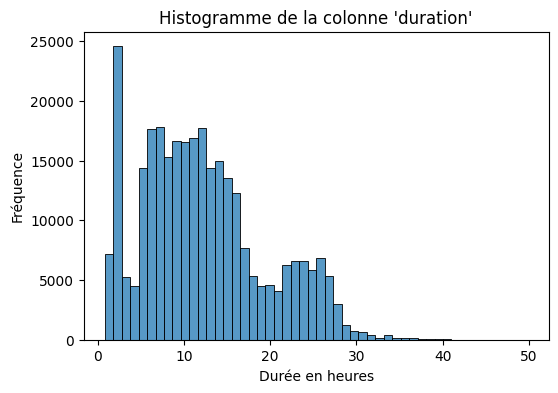

count    300153.000000
mean         12.221021
std           7.191997
min           0.830000
25%           6.830000
50%          11.250000
75%          16.170000
max          49.830000
Name: duration, dtype: float64


--------------------------------------------------




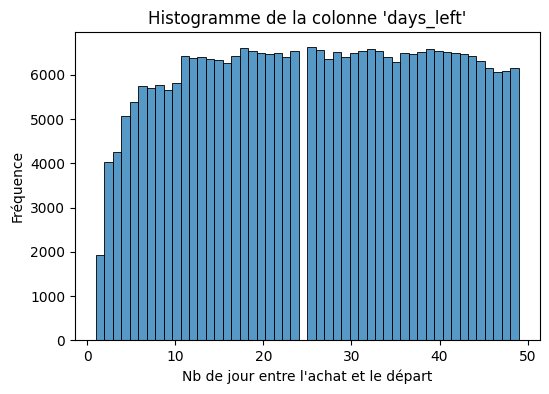

count    300153.000000
mean         26.004751
std          13.561004
min           1.000000
25%          15.000000
50%          26.000000
75%          38.000000
max          49.000000
Name: days_left, dtype: float64


--------------------------------------------------




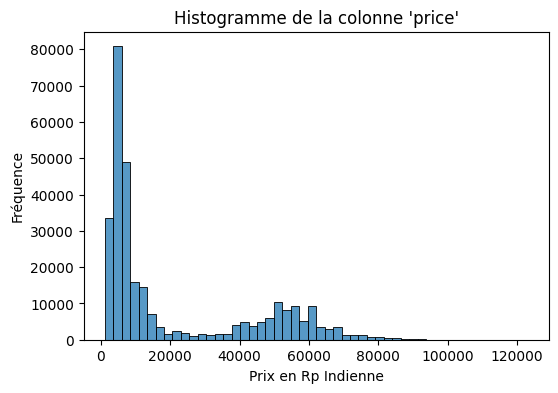

count    300153.000000
mean      20889.660523
std       22697.767366
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64


--------------------------------------------------




In [ ]:
#Visualiser les colonnes avec des valeurs numériques

colonnes_numeriques = df.select_dtypes(include='number').columns.tolist()

# Configuration générale des graphiques
plt.figure(figsize=(10, 6))

# Créer des histogrammes pour chaque colonne numérique
for colonne in colonnes_numeriques:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[colonne], bins=50, kde=False)
    plt.title(f"Histogramme de la colonne '{colonne}'")
    if colonne == 'duration' :
      plt.xlabel("Durée en heures")
    elif colonne == 'days_left' :
      plt.xlabel("Nb de jour entre l'achat et le départ")
    else :
      plt.xlabel("Prix en Rp Indienne")
    plt.ylabel("Fréquence")
    plt.show()
    print(df[colonne].describe())
    print("\n")
    print("-" * 50)
    print("\n")


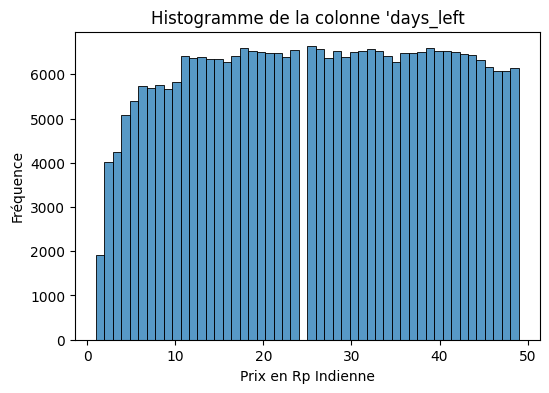

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
count    300153.000000
mean         26.004751
std          13.561004
min           1.000000
25%          15.000000
50%          26.000000
75%          38.000000
max          49.000000
Name: days_left, dtype: float64
La valeur 22 apparaît 0 fois dans la colonne 'price'.


In [ ]:
#Problème sur la colonne days_left

plt.figure(figsize=(6, 4))
sns.histplot(df['days_left'], bins=50, kde=False)
plt.title(f"Histogramme de la colonne 'days_left")
plt.xlabel("Prix en Rp Indienne")
plt.ylabel("Fréquence")
plt.show()
print(df['days_left'].unique())
print(df['days_left'].describe())

count_22 = (df['price'] == 22).sum()
print(f"La valeur 22 apparaît {count_22} fois dans la colonne 'price'.")

